In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score

%matplotlib inline

In [19]:
def get_TP(y_pred,y_true):
    return sum((y_pred==1)&(y_true==1))
def get_FP(y_pred,y_true):
    return sum((y_pred==1)&(y_true==0))
def get_FN(y_pred,y_true):
    return sum((y_pred==0)&(y_true==1))
def get_TN(y_pred,y_true):
    return sum((y_pred==0)&(y_true==0))

In [20]:
def get_confusion_matrix(y_true, y_pred):
    TP = get_TP(y_true, y_pred)
    FN = get_FN(y_true, y_pred)
    FP = get_FP(y_true, y_pred)
    TN = get_TN(y_true, y_pred)
    return TP,FN,FP,TN

In [21]:
def confusion_matrix(y_true, y_pred):
    TP,FN,FP,TN = get_confusion_matrix(y_true, y_pred)
    return np.array([[TN, FP],[FN, TP]])

In [22]:
def get_accuracy(y_true, y_pred):
    TP,FN,FP,TN = get_confusion_matrix(y_true, y_pred)
    accuracy = (TP + TN)/(TP + FN + FP + TN)
    return accuracy

In [23]:
def get_precision(y_true, y_pred):
    TP,FN,FP,TN = get_confusion_matrix(y_true, y_pred)
    precision = TP/(TP + FP)
    return precision

In [24]:
def get_recall(y_true, y_pred):
    TP,FN,FP,TN = get_confusion_matrix(y_true, y_pred)
    recall = TP/(TP + FN)
    return recall

In [25]:
def get_f1_score(y_true, y_pred):
    recall = get_recall(y_true,y_pred)
    precision = get_precision(y_true,y_pred)
    return 2/(1/recall + 1/precision)

In [26]:
data = pd.read_csv('creditcard.csv')
data['Hour'] = data['Time'].apply(lambda x : np.ceil(x/3600)%24)

In [27]:
X = data.drop(['Time', 'Class'], axis=1).values
y = data['Class'].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [68]:
model = LogisticRegression(class_weight={0:1,1:10})
model.fit(X_train,y_train)
predictions = model.predict(X_test)
decision_values = model.decision_function(X_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [69]:
accuracy_score = get_accuracy(y_test,predictions)
prediction_score = get_precision(y_test,predictions)
recall_score = get_recall(y_test,predictions)
f1_score = get_f1_score(y_test,predictions)
auc_score = roc_auc_score(y_test, decision_values)

In [70]:
print('accuracy:{}, precision:{}, recall:{}, f1 score:{}, auc score:{}'.format(
    accuracy_score,prediction_score,recall_score,f1_score,auc_score),end="\n")

accuracy:0.9992626663389628, precision:0.8300653594771242, recall:0.774390243902439, f1 score:0.8012618296529969, auc score:0.9764197045527869


In [64]:
weights = 10**(np.linspace(1,4,20))

In [65]:
f1_score = []
auc_score = []

In [66]:
for weight in weights:
    model = LogisticRegression(class_weight={0:1,1:weight})
    model.fit(X_train,y_train)
    decision_values = model.decision_function(X_test)
    pred = model.predict(X_test)
    f1 = get_f1_score(y_test,pred)
    auc = roc_auc_score(y_test, decision_values)
    f1_score.append(f1)
    auc_score.append(auc)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

Text(0, 0.5, 'auc_score')

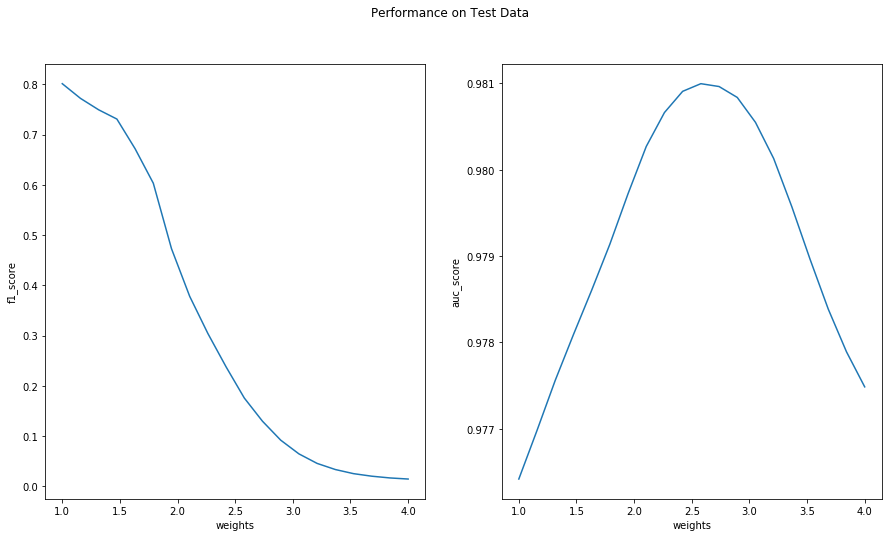

In [67]:
fig = plt.figure(figsize = (15,8))
fig.suptitle('Performance on Test Data')
plt.subplot(121)
plt.plot(np.log(weights)/np.log(10),f1_score)
plt.xlabel('weights')
plt.ylabel('f1_score')
plt.subplot(122)
plt.plot(np.log(weights)/np.log(10),auc_score)
plt.xlabel('weights')
plt.ylabel('auc_score')